<img src='graphics/apples_and_oranges.png'>
<img src='graphics/spacer.png'>

<center><font style="font-size:40px;">Introduction to A/B Testing </font></center>
<center>Prepared and coded by Ben P. Meredith, Ed.D.</center>

# What is A/B Testing?

Whether it is a product, website or app, in today's business analytics world knowing what your customers want is an important business decision. Along with generating greater sales, having evidence to support a business leader's decision on which variation of a product to manufacture saves resources. The most common method today to determine which of two variations on a product, website or app that most appeals to consumers is the over 100 year old method called, "A/B Testing".

In its basic form, A/B testing is a way to compare two variations of something to determine which performs better (or put differently, which version of the product, website or app that most appeals to the consumer). This simple controlled experiment compares two variations of the same item ("A" and "B") to determine how the variation in the two items might affect consumer behavior. 

Along with the consumer market, A/B testing is frequently used in political campaigning also. According to Wikipedia, "In 2007, Barack Obama's presidential campaign used A/B testing as a way to garner online attraction and understand what voters wanted to see from the presidential candidate. For example, Obama's team tested four distinct buttons on their website that led users to sign up for newsletters. Additionally, the team used six different accompanying images to draw in users. Through A/B testing, staffers were able to determine how to effectively draw in voters and garner additional interest."

**NOTE:** A/B Testing is called, "two sample hypothesis testing" in straight statistics. These come in a variety of common techniques such as [Z-Tests](https://en.wikipedia.org/wiki/Z-test), [Student's T-tests](https://en.wikipedia.org/wiki/Student%27s_t-test), [Welch's T-tests](https://en.wikipedia.org/wiki/Welch%27s_t-test), and [Fisher's exact test](https://en.wikipedia.org/wiki/Fisher%27s_exact_test). 


# A/B Testing in Practice

You have been contracted by "Acme e-Commerce" to help them understand what factors drive sales. They've collected data on 500 purchases made recently, including how much time was spent on the page, how many reviews the product had, and the product rating. They would like to understand what factors in their data are driving sales. 

## The data

The Acme e_Commerce company has collected data on 500 purchases. They know:
* The amount of time in seconds an individual user spent on that page
* The number of product reviews
* The product rating
* Whether the user purchased the product or not.

This data is located in the `data` folder as `sales_table.csv`. 

## Your task

Your task is to use A/B testing to test whether the mean time spent on the page, the mean number of reviews, and the mean product rating are different between populations that did and did not make a purchase. The goal of your work is to make a recommendation for how to identify products that will sell better. **To conclude, provide a recommendation for identifying products that will perform well and products that will perform poorly in the marketplace.**

# Load in Our Needed Libraries

In [1]:
import pandas as pd # We are going to work with DataFrames.
import numpy as np # This is a statistics library that is common to use in Python.
from scipy import stats # This is a Python library for scientific and engineering computations. 
import matplotlib.pyplot as plt # We are going to want to graph our results. 

# We are going to want to show our graphs in Jupyter Notebooks.
%matplotlib inline  

# And we want to make the graphs pretty. 
plt.style.use('ggplot') 

# Loading our Data

Let's load our data into a DataFrame and conduct a very simple EDA. 

In [2]:
df = pd.read_csv('data/sales_table.csv')

In [3]:
df.shape

(500, 4)

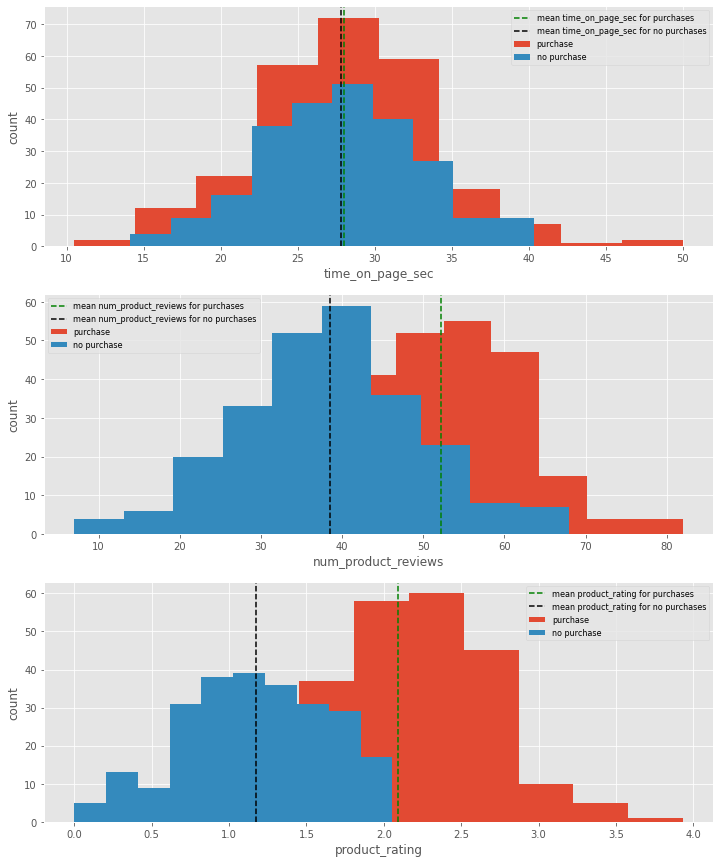

In [21]:
# Plot the distributions of each numerical column using Matplotlib

fig = plt.figure(figsize=(12, 15)) # Set our figure size

for index, column in enumerate(df.columns[:3]): # Enumerate through the DataFrame
    fig.add_subplot(3,1,1+index) # for each numerical column, make a separate plot
    
    # plot a histogram where 'yes' is in the purchase column and label it 'purchase'
    plt.hist(df[column][df['purchase']=='yes'], label = 'purchase')
    
    # plot a histogram where 'no' is in the purchase column and lable it 'no purchase'
    plt.hist(df[column][df['purchase']=='no'], label = 'no purchase')
    
    # Add a line at the mean for 'purchase' category
    plt.axvline(df[column][df['purchase']=='yes'].mean(),
                   label = 'mean {} for purchases'.format(column),
                   color='green', linestyle='--')
                   
    # Add a line at the mean for 'no purchase' category
    plt.axvline(df[column][df['purchase']=='no'].mean(),
               label='mean {} for no purchases'.format(column),
               color='black', linestyle='--')
    
    plt.legend(fontsize = 8) #set the font size of the legend
    plt.xlabel(column) # set the xlabel
    plt.ylabel('count') # set the ylabel

plt.show()

What do we observe from the graphs?
1. The means of the time spent on each page appear the same for purchases and no-purchases.
1. For number of reviews and product rating, the purchase mean seems higher than the no-purchase mean.

How many purchases? How many non-purchases?

In [19]:
df['purchase'].value_counts()

yes    252
no     248
Name: purchase, dtype: int64

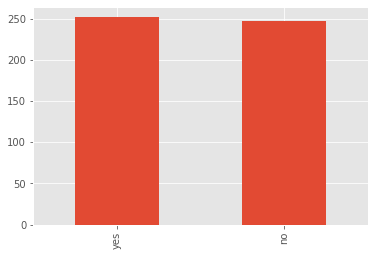

In [20]:
df['purchase'].value_counts().plot.bar()

# Hypothesis Testing using a _t_-test

Now let's establish our hypothesis and test it. 

Our hypothesis is "There is no difference in the mean between purchases and non-purchases." As we believe that there is a difference in the mean between purchases and non-purchases, our _null hypothesis_ (the opposite) would be that "There is a difference in the mean between purchases and non-purchases." 

Statistical significance is generally determined by the [_p-value_](https://en.wikipedia.org/wiki/P-value). Generally, if a _p-value_ is less than 0.05, it is considered statistcally significant and the _null hypothesis_ is rejected. 

Just determining the _p-value_ is not enough for us as seasoned data scientists, so we are going to go the extra mile to make our hypothesis testing output look good. 

In [23]:
for column in df.columns[:3]:
    
    # Print out our two hypotheses with null hypothesis first
    print('H0: there is no difference in mean {} of purchases and non-purchases.'.format(column))
    print('H1: there is a difference in mean {} of purchases and non-purchases.'.format(column))
    
    # Establish our purchas and non-purchase variables
    purchase = df[column][df['purchase'] == 'yes']
    no_purchase = df[column][df['purchase'] == 'no']
    
    # Determine p-value using scipy's stats library
    pvalue = stats.ttest_ind(purchase, no_purchase).pvalue
    
    #Print out our results
    if pvalue >= .05:
        print('''Since the p-value is {}, we cannot reject our null hypothesis. 
                There is no difference in the mean {} of purchases and non-purchases.'''
                 .format(round(pvalue, 2), column))
    else:
        print('''Since the pvalue is {}, we can reject our null hypothesis. 
        There is a difference in mean {} of purchases and non-purchases.'''
              .format(round(pvalue,2), column))
        
    # Give us a nice dotted line between outputs for each column  
    print('-'*100, '\n') 

H0: there is no difference in mean time_on_page_sec of purchases and non-purchases.
H1: there is a difference in mean time_on_page_sec of purchases and non-purchases.
Since the p-value is 0.71, we cannot reject our null hypothesis. 
                There is no difference in the mean time_on_page_sec of purchases and non-purchases.
---------------------------------------------------------------------------------------------------- 

H0: there is no difference in mean num_product_reviews of purchases and non-purchases.
H1: there is a difference in mean num_product_reviews of purchases and non-purchases.
Since the pvalue is 0.0, we can reject our null hypothesis. 
        There is a difference in mean num_product_reviews of purchases and non-purchases.
---------------------------------------------------------------------------------------------------- 

H0: there is no difference in mean product_rating of purchases and non-purchases.
H1: there is a difference in mean product_rating of pur

## Conclusion

It turns out that customers who purchase products don't spend more time on each page. However, customers tend to purchase better-rated products with more reviews. If we want to increase sales, we should promote products on these two factors. 

---

# Hypothesis Testing using *Chi*-Square

So far we've been working with the t-test, which tests differences in means. Another common hypothesis test is the chi-square test, which tests whether two proportions are different. We're going to use this to do some A/B testing with the chi-square test. 

The buy button on the e-commerce marketplace's product pages is red. However, they want to see if a yellow button will do better. You've designed an experiment to test this!

Here's the setup of the A/B test:

* Control Group: Red Button
* Experimental Group: Yellow Button

We will conduct this experiment with 1000 users. Each user will be randomly assigned to a group (experimental or control). After, we will use a chi-square test to obtain a p-value.

## Chi-square Test

A chi-square test tests the null hypothesis that our observed proportions are the same between our groups. In our case, we only have one proportion - the proportion of purchases. So, in our case, 

> $H_0$: The observed proportion of purchases is the same between control and experimental groups.

Our alternative hypothesis is that:

> $H_1$: The observed proportion of purchases is not the same between control and experimental groups.

To do this we are going to:
1. Run the `generate_test_data` function and store the results in variable, `abdata`. This will generate data for our example. 
2. Use `pd.crosstab` of our `group` and `purchase` columns. This returns the observed frequencies of purchases for our control and experimental groups (this is called a contingency table).
3. Use `scipy.stats.chi2_contingency()`. You may pass your crosstab as an argument to this function. It returns four items: the chi-square statistic, the p-value, the [degrees of freedom](https://en.wikipedia.org/wiki/Degrees_of_freedom_(statistics)), and the expected frequencies based on the observations in the table.
4. Interpret the p-value. Is there enough 'evidence' to reject our null hypothesis? 

Based on our observations and p-value, what would be our recommendation? Would we recommend sticking with the red button or moving to the yellow button?


In [24]:
def generate_test_data(n_users = 1000, seed = 42):
    '''
    Randomly generates test groups. 
    Returns a DataFrame where the first column is the group, and the second column is whether the customer 
    purchased.
    '''
    np.random.seed(seed)
    data = []
    for user in range(n_users):
        if np.random.random(1) > .5:
            if np.random.random(1) < .3:
                data.append(('control','yes'))
            else:
                data.append(('control','no'))
        else:
            if np.random.random(1) < .35:
                data.append(('experimental','yes'))
            else:
                data.append(('experimental','no'))
    return pd.DataFrame(data, columns = ['group','purchase'])

In [26]:
abdata = generate_test_data()

abdata.head()

,group,purchase
0,experimental,no
1,control,no
2,experimental,yes
3,experimental,no
4,control,no


In [28]:
contingency_table = pd.crosstab(abdata.group, abdata.purchase)
contingency_table

purchase,no,yes
group,,
control,358,138
experimental,332,172


In [29]:
chi_stat, chi_p_val, degree_of_freedom, exp_freq = stats.chi2_contingency(contingency_table)

In [30]:
chi_p_val

0.03690091319141065

## Conclusion

The pvalue is .036. Since it's less than `.05`, we will reject our null hypothesis, in favor of the conclusion that customers served the yellow button have an altered observed purchase proportion. Based on the crosstab, it seems like the experimental group had a higher purchase proportion. Thus, we would recommend moving forward with the yellow button.

# Additional Readings

1. ['A Refresher on A/B Testing' - Harvard Business Review](https://hbr.org/2017/06/a-refresher-on-ab-testing')
1. ['Data Science You Need to Know! A/B testing' - Towards Data Science](https://towardsdatascience.com/data-science-you-need-to-know-a-b-testing-f2f12aff619a)
1. ['A/B Testing' - Wikipedia](https://en.wikipedia.org/wiki/A/B_testing)
1. ['Matplotlib Style Sheets Reference'](https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html)